<a href="https://colab.research.google.com/github/Krishna185888/Python-Basics/blob/main/S_Krishna_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn plotly ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
import zipfile
import os

# Define the path to the zip file and the target directory for extraction
zip_file_path = 'archive.zip'
extracted_file_name = 'AI_index_db.csv'

# Check if the CSV file already exists, if not, extract it from the zip
if not os.path.exists(extracted_file_name):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall('.') # Extract all contents to the current directory
        print(f"'{extracted_file_name}' extracted from '{zip_file_path}'.")
    except FileNotFoundError:
        print(f"Error: The zip file '{zip_file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred during extraction: {e}")

# Now, attempt to read the CSV file
df = pd.read_csv(extracted_file_name)

print(f"Dataset Shape: {df.shape}")
df.head()

'AI_index_db.csv' extracted from 'archive.zip'.
Dataset Shape: (62, 13)


,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [5]:
print("Dataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB
None

Basic Statistics:
           Talent  Infrastr

In [6]:
numeric_features = [
    'Talent', 'Infrastructure', 'Operating Environment',
    'Research', 'Development', 'Government Strategy',
    'Commercial', 'Total score'
]

df_numeric = df[numeric_features].copy()

print(f"Numeric features selected: {df_numeric.shape}")
df_numeric.head()

Numeric features selected: (62, 8)


,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
0,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00
1,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92
2,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93
3,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19
4,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89


In [7]:
print("Missing values before imputation:")
print(df_numeric.isnull().sum())
df_numeric.fillna(df_numeric.mean(), inplace=True)
print("\nMissing values after imputation:")
print(df_numeric.isnull().sum().sum())

Missing values before imputation:
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
dtype: int64

Missing values after imputation:
0


In [9]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).sum()
print("Outliers detected per feature:")
print(outliers)
df_clean = df_numeric[
    ~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
]
print(f"\nShape before outlier removal: {df_numeric.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

Outliers detected per feature:
Talent                   1
Infrastructure           3
Operating Environment    2
Research                 2
Development              3
Government Strategy      0
Commercial               7
Total score              2
dtype: int64

Shape before outlier removal: (62, 8)
Shape after outlier removal: (50, 8)


In [10]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(
    scaler.fit_transform(df_clean),
    columns=df_clean.columns,
    index=df_clean.index
)

print("Data normalized to [0, 1] range")
df_scaled.head()

Data normalized to [0, 1] range


,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
7,0.747294,0.772990,0.813892,0.667887,0.733171,0.680454,0.599517,1.000000
8,0.610338,0.696302,0.536209,0.937238,0.602430,0.923824,1.000000,0.989573
9,0.625580,0.695177,0.688834,0.666318,0.521021,0.995307,0.922799,0.935082
10,0.561741,0.474598,0.396200,0.853295,1.000000,0.896104,0.810615,0.916246
11,0.661144,0.893730,0.535119,0.439069,0.749696,0.757830,0.475271,0.888665


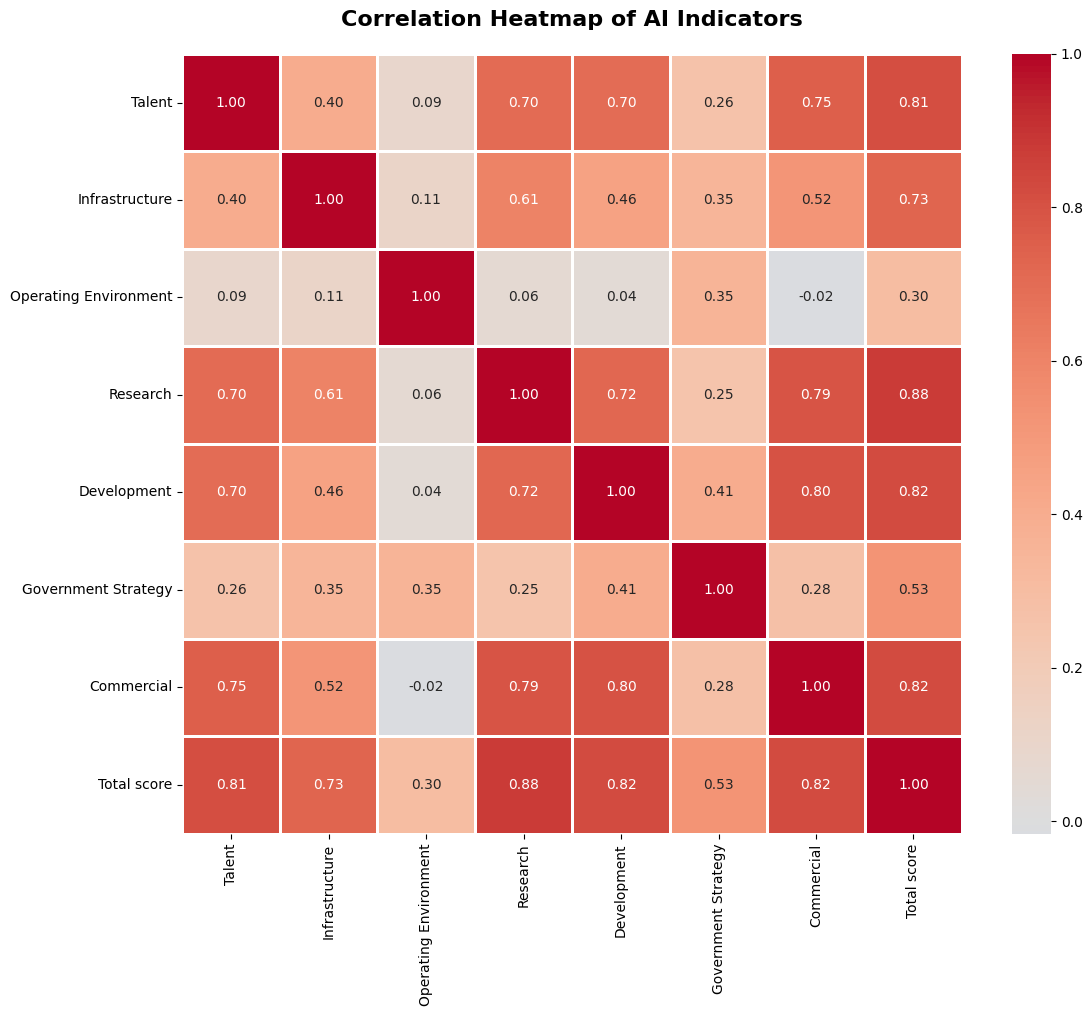

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt='.2f', square=True)
plt.title('Correlation Heatmap of AI Indicators', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

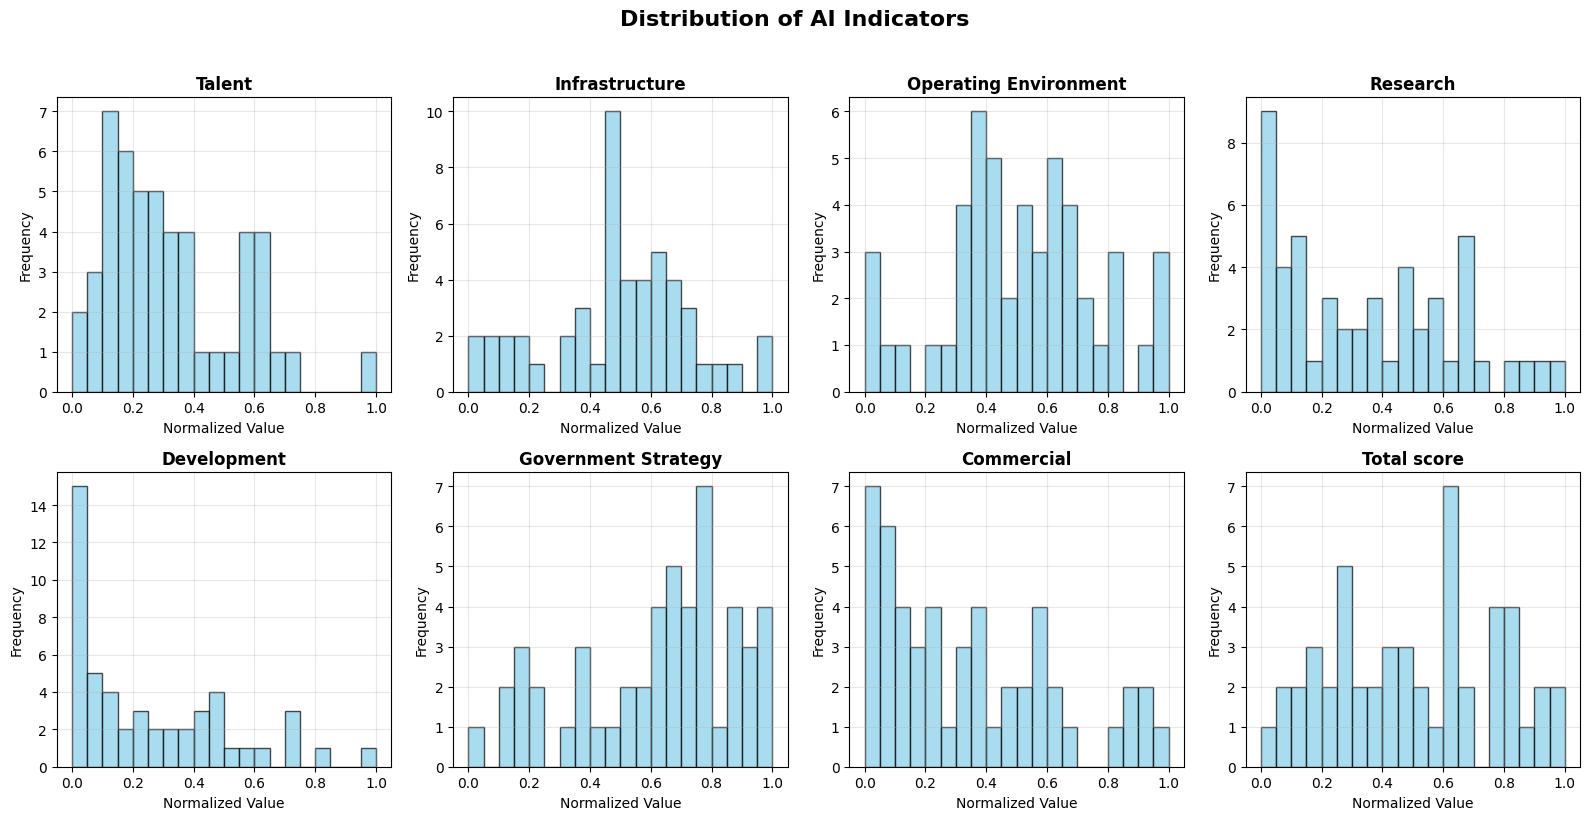

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(df_scaled.columns):
    axes[idx].hist(df_scaled[col], bins=20, edgecolor='black', color='skyblue', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('Normalized Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.suptitle('Distribution of AI Indicators', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

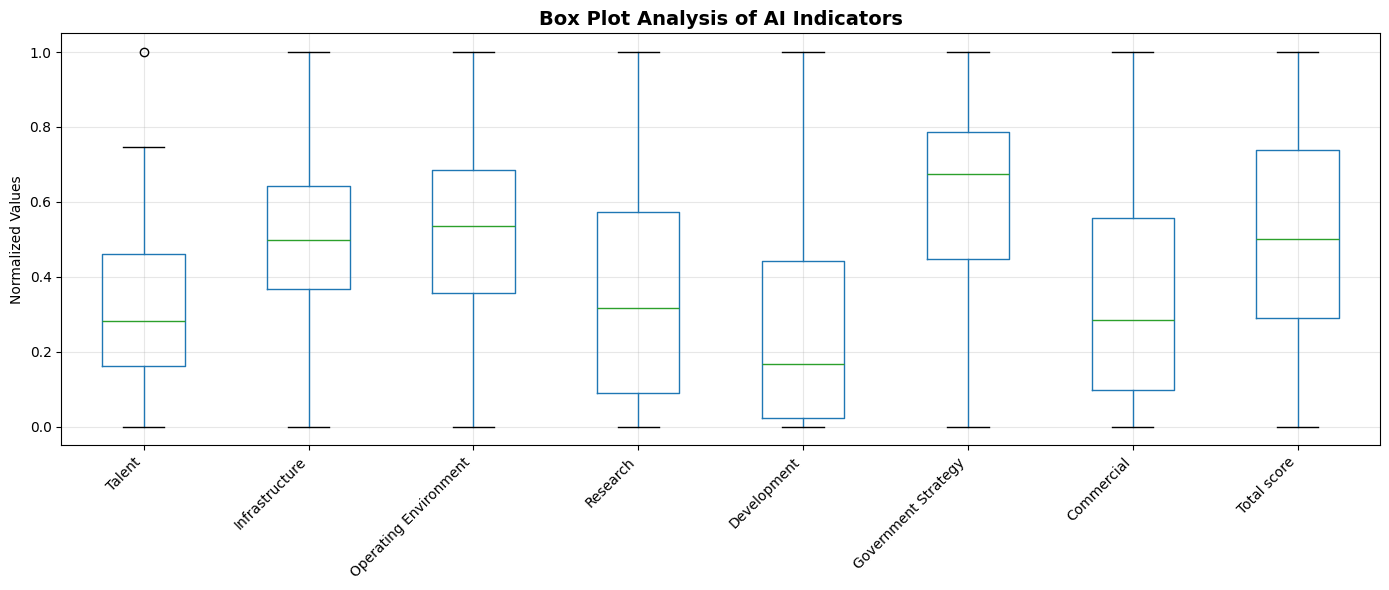

In [16]:
plt.figure(figsize=(14, 6))
df_scaled.boxplot()
plt.title('Box Plot Analysis of AI Indicators', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Normalized Values')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

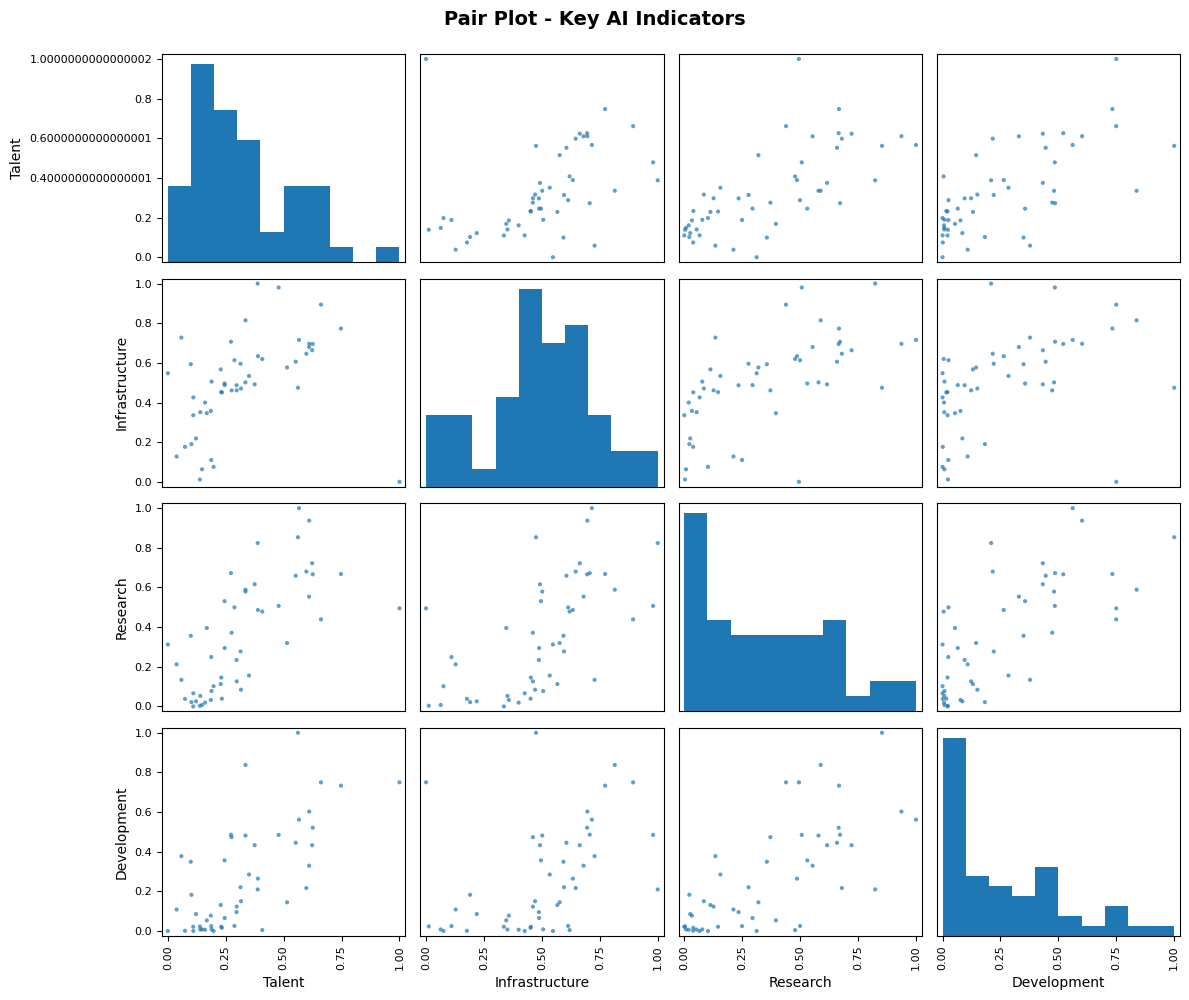

In [18]:
selected_features = ['Talent', 'Infrastructure', 'Research', 'Development']
plt.figure(figsize=(12, 10))
pd.plotting.scatter_matrix(df_scaled[selected_features], figsize=(12, 10), alpha=0.7, diagonal='hist')
plt.suptitle('Pair Plot - Key AI Indicators', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [20]:
pca = PCA(n_components=0.85)
pca_result = pca.fit_transform(df_scaled)
print(f"Original features: {df_scaled.shape[1]}")
print(f"Principal components explaining 85% variance: {pca_result.shape[1]}")

print(f"\nExplained variance ratio:\n{pca.explained_variance_ratio_}")
print(f"\nCumulative explained variance:\n{np.cumsum(pca.explained_variance_ratio_)}")

Original features: 8
Principal components explaining 85% variance: 4

Explained variance ratio:
[0.61520836 0.15645579 0.07740942 0.06912498]

Cumulative explained variance:
[0.61520836 0.77166415 0.84907357 0.91819855]


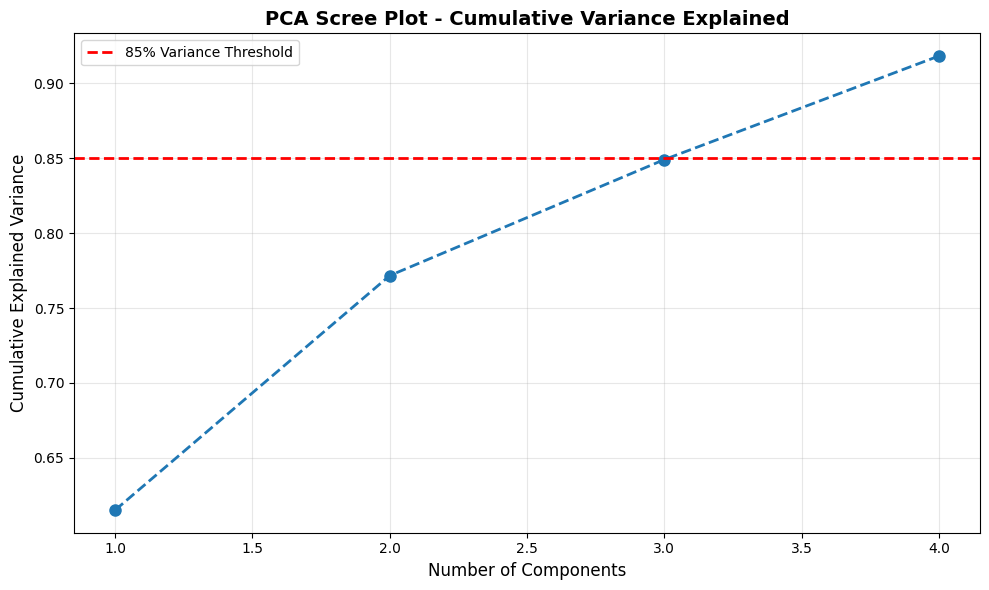

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('PCA Scree Plot - Cumulative Variance Explained', fontsize=14, fontweight='bold')
plt.axhline(y=0.85, color='r', linestyle='--', linewidth=2, label='85% Variance Threshold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
pca_full = PCA()
pca_full.fit(df_scaled)
loadings = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(len(df_scaled.columns))],
    index=df_scaled.columns
)
print("PCA Component Loadings (First 3 components):")
print(loadings.iloc[:, :3])

PCA Component Loadings (First 3 components):
                            PC1       PC2       PC3
Talent                 0.302486 -0.107582 -0.101114
Infrastructure         0.285257  0.068960 -0.082901
Operating Environment  0.076178  0.691021 -0.625868
Research               0.438065 -0.184391 -0.235872
Development            0.398234 -0.096965  0.220689
Government Strategy    0.227658  0.618287  0.688248
Commercial             0.447969 -0.258462  0.028218
Total score            0.467261  0.116946 -0.111230


In [26]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
print("Elbow method calculation completed")

Elbow method calculation completed


In [28]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
print("Elbow method calculation completed")

Elbow method calculation completed


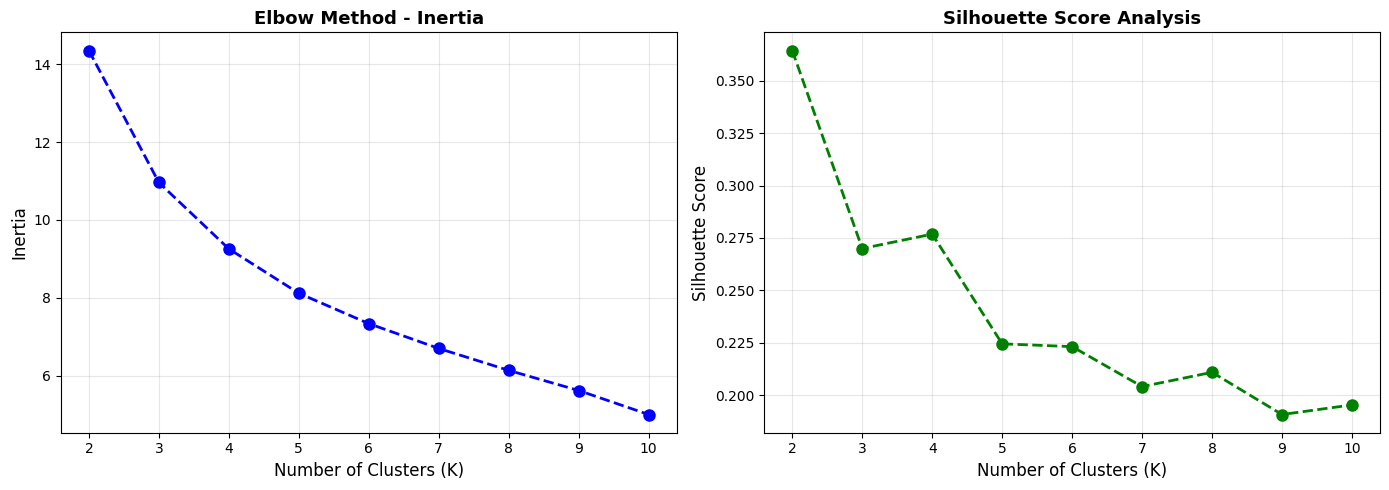

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(K_range, inertias, marker='o', linestyle='--', linewidth=2, markersize=8, color='blue')
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method - Inertia', fontweight='bold', fontsize=13)
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Analysis', fontweight='bold', fontsize=13)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = cluster_labels
print(f"K-Means Clustering with k={optimal_k}")
print(f"\nCluster distribution:\n{pd.Series(cluster_labels).value_counts().sort_index()}")

K-Means Clustering with k=5

Cluster distribution:
0     8
1     7
2     9
3    13
4    13
Name: count, dtype: int64


In [34]:
sil_score = silhouette_score(df_scaled.drop('Cluster', axis=1), cluster_labels)
db_score = davies_bouldin_score(df_scaled.drop('Cluster', axis=1), cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print("\nInterpretation:")
print(f"- Silhouette Score closer to 1 indicates better clustering")
print(f"- Davies-Bouldin Index closer to 0 indicates better clustering")

Silhouette Score: 0.2245
Davies-Bouldin Index: 1.2984

Interpretation:
- Silhouette Score closer to 1 indicates better clustering
- Davies-Bouldin Index closer to 0 indicates better clustering


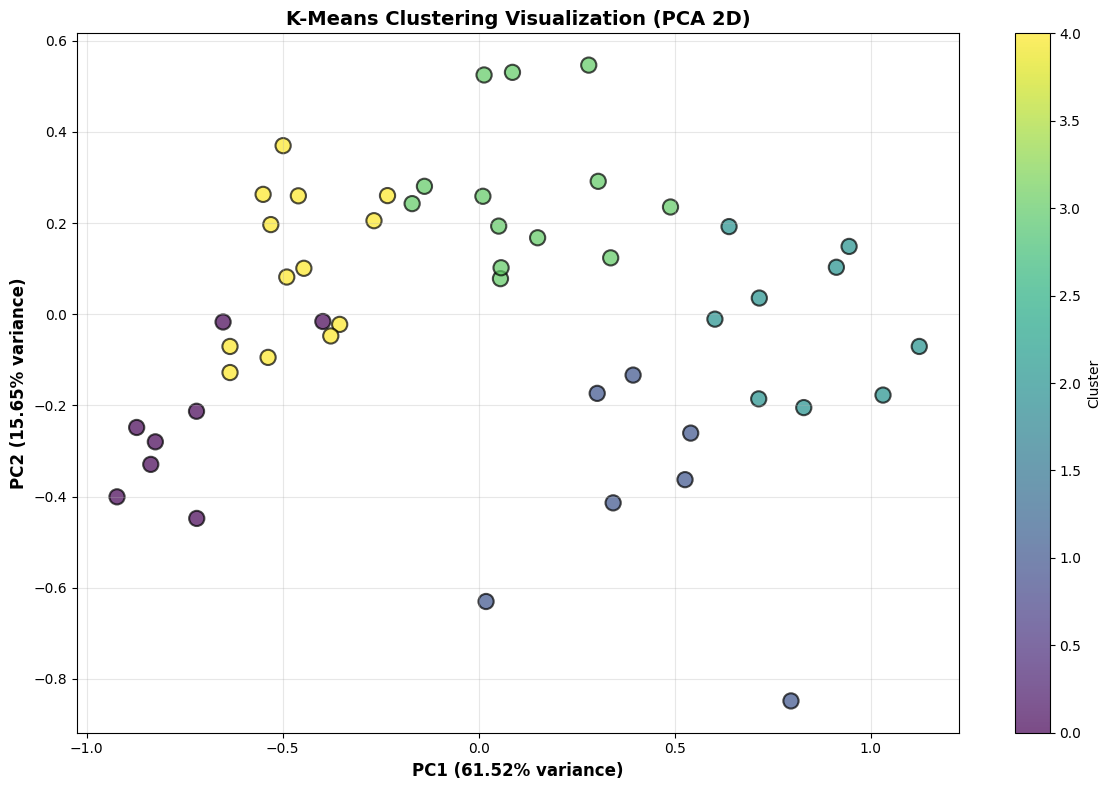

In [36]:
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_scaled.drop('Cluster', axis=1))
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=cluster_labels, cmap='viridis', s=120, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Visualization (PCA 2D)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
df_with_clusters = df.iloc[df_scaled.index].copy()
df_with_clusters['Cluster'] = cluster_labels
print("Sample countries per cluster:")
for i in range(optimal_k):
    countries = df_with_clusters[df_with_clusters['Cluster'] == i]['Country'].head(5).tolist()
    print(f"\nCluster {i}: {', '.join(countries)}")

Sample countries per cluster:

Cluster 0: Greece, Uruguay, Bahrain, Tunisia, South Africa

Cluster 1: Switzerland, Sweden, Hong Kong, Taiwan, Norway

Cluster 2: The Netherlands, Germany, France, Australia, Ireland

Cluster 3: Denmark, Spain, Austria, Saudi Arabia, Poland

Cluster 4: Lithuania, Brazil, Slovakia, Hungary, Malaysia


In [40]:
cluster_summary = df_scaled.drop('Cluster', axis=1).groupby(cluster_labels).mean()
print("Cluster Profiles (Mean normalized values):")
print(cluster_summary.round(3))

Cluster Profiles (Mean normalized values):
   Talent  Infrastructure  Operating Environment  Research  Development  \
0   0.137           0.211                  0.397     0.082        0.034   
1   0.457           0.698                  0.264     0.690        0.358   
2   0.619           0.659                  0.568     0.646        0.680   
3   0.311           0.565                  0.710     0.381        0.254   
4   0.175           0.381                  0.498     0.113        0.060   

   Government Strategy  Commercial  Total score  
0                0.203       0.080        0.139  
1                0.447       0.605        0.672  
2                0.816       0.745        0.886  
3                0.823       0.325        0.596  
4                0.640       0.114        0.298  


<Figure size 1200x600 with 0 Axes>

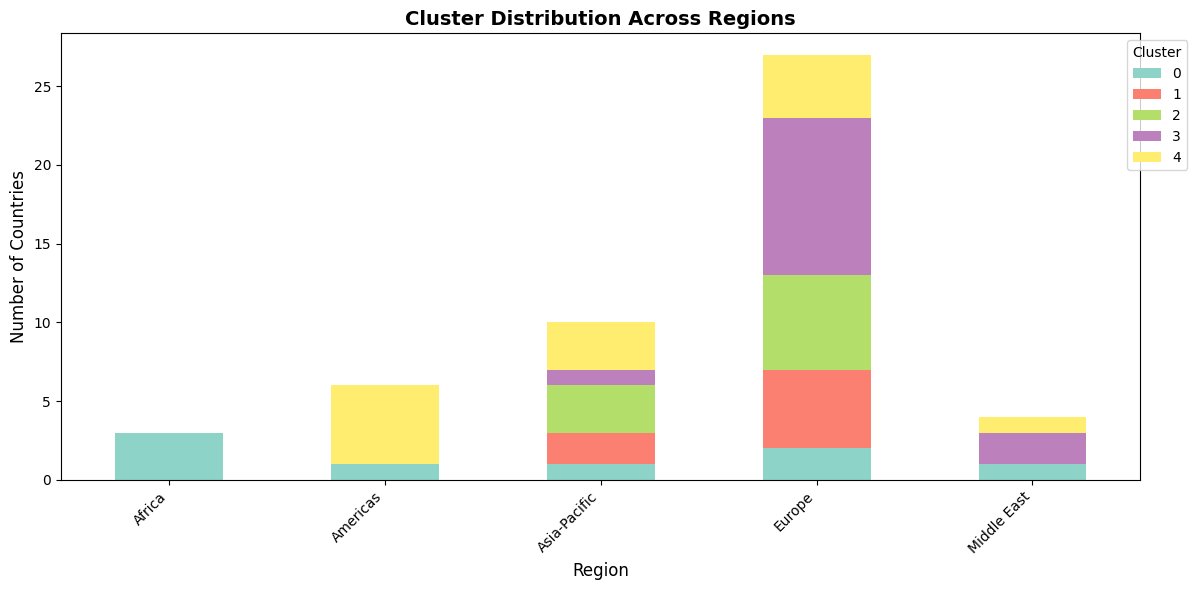

In [42]:
region_cluster = pd.crosstab(df_with_clusters['Region'], df_with_clusters['Cluster'])
plt.figure(figsize=(12, 6))
region_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Cluster Distribution Across Regions', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [44]:
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_scaled.drop('Cluster', axis=1))
fig = px.scatter_3d(
    x=pca_3d_result[:, 0], y=pca_3d_result[:, 1],
    z=pca_3d_result[:, 2], color=cluster_labels.astype(str),
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Cluster'},
    title='3D Cluster Visualization (PCA)',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hover_data=[df_with_clusters['Country'].values]
)
fig.update_traces(marker=dict(size=8))
fig.show()

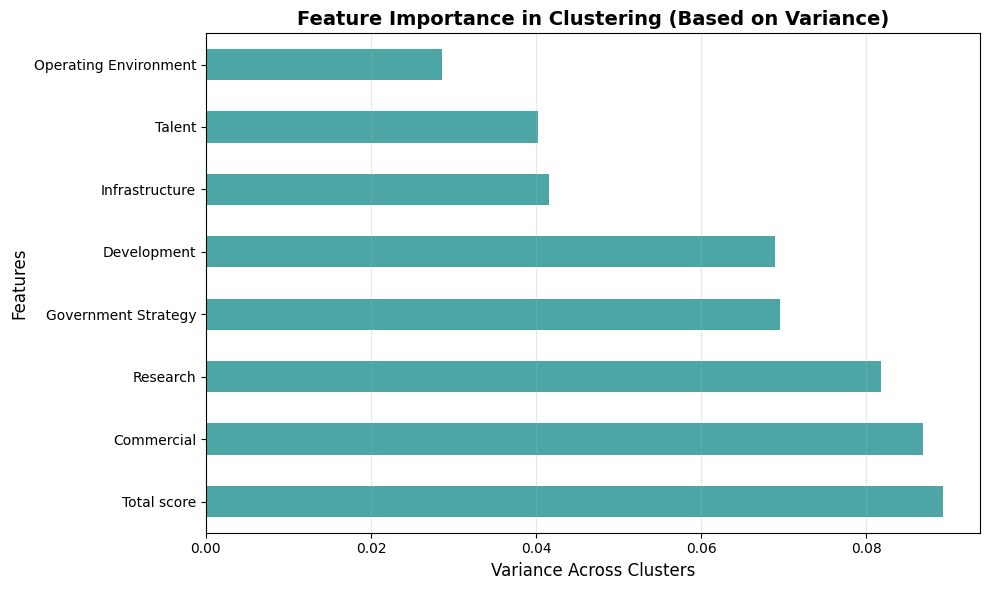

In [46]:
cluster_means = df_scaled.drop('Cluster', axis=1).groupby(cluster_labels).mean()
feature_variance = cluster_means.var()
feature_importance = feature_variance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='teal', alpha=0.7)
plt.title('Feature Importance in Clustering (Based on Variance)', fontsize=14, fontweight='bold')
plt.xlabel('Variance Across Clusters', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [48]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="AI Global Index - EDA Report", explorative=True, minimal=False)
profile.to_file("AI_Global_Index_EDA_Report.html")
print("EDA Report generated: AI_Global_Index_EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 76.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA Report generated: AI_Global_Index_EDA_Report.html
